# Import libraries and packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Importing dataset

In [3]:
df_score = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df_score.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Checking dataset for missing values

In [6]:
df_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

> So there are no null/missing values

In [7]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plot relationship between the hours variable and the target score

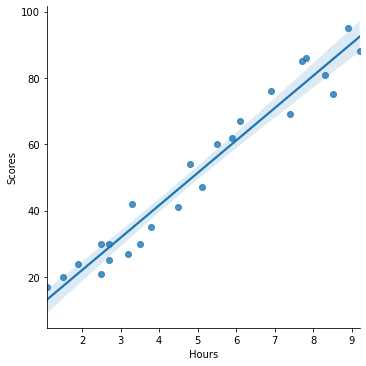

In [9]:
sns.lmplot(x='Hours',y='Scores',data=df_score)

> There is a linear relationship between the feature hours and target score

In [10]:
df_score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting data

In [11]:
X = df_score[['Hours']]
y= df_score['Scores']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=18, test_size=0.20)

In [12]:
X_train.shape

(20, 1)

# Training the model

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

> print out coefficients and intercept of the Linear Regression Model

In [14]:
print("Coefficients: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Coefficients:  [9.59195136]
Intercept:  3.680042001416318


> Thus,
> #### score = hours*(9.59) + 3.68

In [37]:
yo = lr_model.intercept_ + (lr_model.coef_ * X_train)

> ### Plotting on trained data

Text(0.5, 1.0, 'Regression line(Training set)')

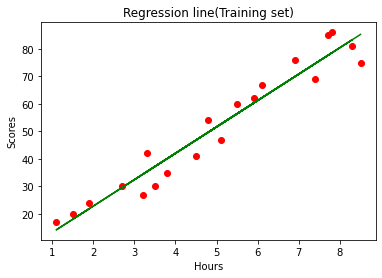

In [38]:
plt.scatter(X_train,y_train, color='red',marker='o')
plt.plot(X_train,yo,color='green')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression line(Training set)')

# Predicting test data

In [39]:
ypred = lr_model.predict(X_test)

In [40]:
ypred

array([27.65992039, 27.65992039, 91.92599448, 29.57831066, 89.04840907])

In [41]:
scoretable = pd.DataFrame({'Actual Score':y_test, 'Predicted Score': ypred})
scoretable

,Actual Score,Predicted Score
0,21,27.659920
16,30,27.659920
6,88,91.925994
9,25,29.578311
15,95,89.048409


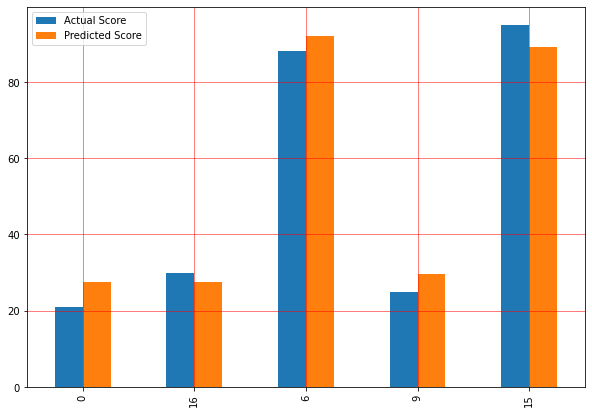

In [42]:

scoretable.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

> ###  plotting regression line on testing set

# Evaluating the model

>  ### Metrics:
> Mean absolute error <br>
> Mean sqaured error <br>
> R sqaured 

In [43]:
print("MAE: ", metrics.mean_absolute_error(y_test,ypred))
print("MSE: ", metrics.mean_squared_error(y_test,ypred))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test,ypred)))

MAE:  4.691179214182799
MSE:  24.325261590981185
RMSE:  2.1659130209181527


In [44]:
print("Accuracy of the model : " , metrics.r2_score(ypred,y_test))

Accuracy of the model :  0.9738290779581299


# the model has 97% accuracy which indicates that above fitted model is <BR> GOOD MODEL

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [45]:
predictionScore = lr_model.predict([[9.25]])

print("Predicted score of a student studying for 9.25 hrs/day is : ", predictionScore)

Predicted score of a student studying for 9.25 hrs/day is :  [92.40559205]


# Final result:

> If a student studies for 9.25 hrs/day, he/she can approximately score 92.4055 marks